# JPL Small-Body Mission Design API Tutorial

This Jupyter Notebook introduces the use of the JPL Small-Body Mission Design API. It will demonstrate how to query small body data, extract trajectory information, and use this data for planning or analysis purposes.

In [1]:
# Section 1: Import Required Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
# Section 2: API Overview and Base URL
base_url = "https://ssd-api.jpl.nasa.gov/mdesign.api"

In [3]:
# Section 3: Define a helper function to pretty-print JSON responses
def query_api(params):
    response = requests.get(base_url, params=params)
    response.raise_for_status()
    return response.json()

In [12]:
# Section 4: List All Missions to 1 Ceres (JPL Example Call)
print("\nListing available small-body targets:")
params = {"des": "1",
          "class":"true"}
data = query_api(params)
print(f"Available target count: {len(data)}")
pprint(data)  # Print data return 


Listing available small-body targets:
Available target count: 7
{'dv_lowthrust': {'const': 13.3605, 'sep': 38.8809},
 'fields': ['MJD0',
            'MJDf',
            'vinf_dep',
            'vinf_arr',
            'phase_ang',
            'earth_dist',
            'elong_arr',
            'decl_dep',
            'approach_ang',
            'tof'],
 'md_constraints': {'class': 'true', 'des': '1'},
 'modified': '2021-04-16 00:23:08 PDT',
 'object': {'condition_code': '0',
            'data_arc': '9520',
            'des': '1',
            'fullname': '1 Ceres (A801 AA)',
            'md_orbit_id': '48',
            'orbit_class': 'Main-belt Asteroid',
            'orbit_id': '48',
            'spkid': '20000001'},
 'selectedMissions': [[64594,
                       64759,
                       12.2451,
                       21.06,
                       11.94,
                       2.3581,
                       94.29,
                       37.98,
                       101.93,


In [28]:
# Section 5: Query Mission Design Data for a Specific Target (e.g., 1P/Halley)
target = "1P"
print(f"\nQuerying mission design data for target: {target}")
params = {
    "des": target,
    "mjd0": 60676, #Modified Julian date of first launch date to start from 
    "span": 365, #How many days from the launch date to search
    "step": 5, #How many days between search steps
    "tof-min": 180,    # minimum time-of-flight (days)
    "tof-max": 1000,   # maximum time-of-flight (days)    
}
#"vinf-max": 10     # maximum launch C3 (km/s)

result = query_api(params)
pprint(result["fields"])


Querying mission design data for target: 1P
['MJD0',
 'MJDf',
 'vinf_dep',
 'vinf_arr',
 'phase_ang',
 'earth_dist',
 'elong_arr',
 'decl_dep',
 'approach_ang',
 'tof']
[[66003, 73712, 12.2451, 29.7389, 31.43, 4.7476, 69.08, -31.79, 169.34, 7709],
 [65898, 73740, 12.2443, 17.855, 72.84, 3.9791, 96.17, 16.77, 130.35, 7842],
 [65898, 73740, 12.2443, 17.855, 72.84, 3.9791, 96.17, 16.77, 130.35, 7842],
 [65541, 73719, 12.2252, 17.7413, 65.36, 4.5602, 75.55, 24.42, 137.34, 8178],
 [65541, 73719, 12.2252, 17.7413, 65.36, 4.5602, 75.55, 24.42, 137.34, 8178],
 [65275, 73712, 12.2237, 30.5293, 30.67, 4.7476, 69.08, -29.18, 170.09, 8437],
 [65639, 73712, 12.2194, 30.1599, 31.02, 4.7476, 69.08, -30.48, 169.74, 8073],
 [65177, 73719, 12.2094, 17.661, 66.21, 4.5602, 75.55, 24.61, 136.5, 8542],
 [65177, 73719, 12.2094, 17.661, 66.21, 4.5602, 75.55, 24.61, 136.5, 8542],
 [64813, 73719, 12.1964, 17.5902, 66.99, 4.5602, 75.55, 24.92, 135.73, 8906],
 [64813, 73719, 12.1964, 17.5902, 66.99, 4.5602, 75.5


Number of trajectory options found: 16


,MJD0,MJDf,vinf_dep,vinf_arr,phase_ang,earth_dist,elong_arr,decl_dep,approach_ang,tof
0,66003,73712,12.2451,29.7389,31.43,4.7476,69.08,-31.79,169.34,7709
1,65898,73740,12.2443,17.8550,72.84,3.9791,96.17,16.77,130.35,7842
2,65898,73740,12.2443,17.8550,72.84,3.9791,96.17,16.77,130.35,7842
3,65541,73719,12.2252,17.7413,65.36,4.5602,75.55,24.42,137.34,8178
4,65541,73719,12.2252,17.7413,65.36,4.5602,75.55,24.42,137.34,8178


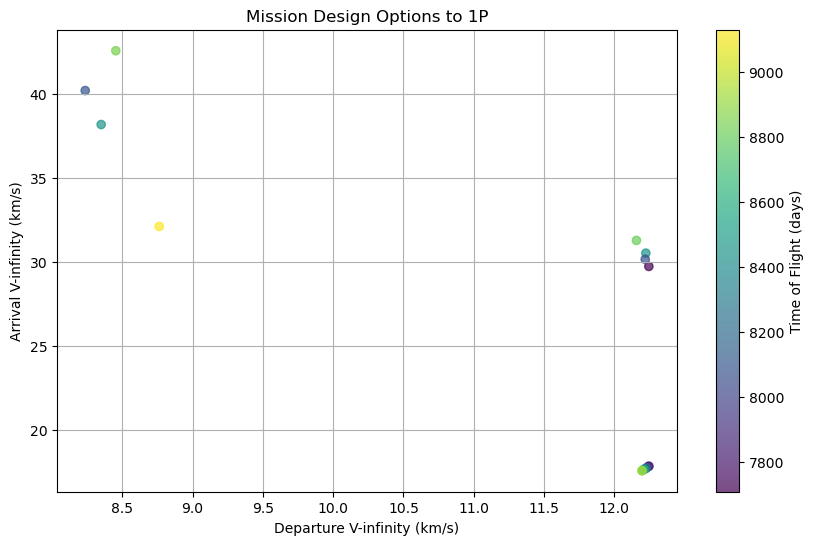

In [30]:
# Section 6: Extract and Display Trajectory Data
traj_data = result["selectedMissions"]
if traj_data:
    print(f"\nNumber of trajectory options found: {len(traj_data)}")
    df = pd.DataFrame(traj_data, columns=result["fields"])
    display(df.head())
    
    # Plotting example: Earth departure vs arrival V-infinity
    plt.figure(figsize=(10, 6))
    plt.scatter(df['vinf_dep'], df['vinf_arr'], alpha=0.7, c=df['MJDf']-df['MJD0'], cmap='viridis')
    plt.colorbar(label='Time of Flight (days)')
    plt.xlabel("Departure V-infinity (km/s)")
    plt.ylabel("Arrival V-infinity (km/s)")
    plt.title(f"Mission Design Options to {target}")
    plt.grid(True)
    plt.show()
else:
    print("No trajectory data returned.")

In [ ]:
# Section 7: Optional – Save Results to CSV
# df.to_csv(f"mission_design_{target}.csv", index=False)

In [ ]:
# Section 8: Additional Exploration
# Try changing `target` to other comet/asteroid designations like "C/2023 A3", "3200", etc.
# Adjust launch window, TOF, or V-infinity limits

_End of notebook_